In [218]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [219]:
pal = ['#8c510a', '#01665e']

### belle data

In [194]:
d = pd.read_csv('https://github.com/brendanrbrown/stor155_sp21/raw/main/data/beauty.csv')

In [195]:
p = d.person.value_counts(normalize = True).loc['BELLE']

In [229]:
def belle_meansd(size, nsamp, d):
    ds = np.array([d.person.sample(size, replace = True).reset_index(drop = True).eq('BELLE').mean() for i in range(nsamp)])
    # first mean just to show the mean itself converges
    return [size, ds.std(), ds[0]]

def mean_sd(sizemax, nsamp, d):
    out = pd.DataFrame([belle_meansd(i, nsamp, d) for i in np.arange(5, sizemax, np.floor(sizemax/100), dtype = int)],
                      columns = ['sample_size', 'mean_sd', 'phat'])
    return out

In [246]:
size, nsamp = 1000, 100

In [247]:
dmean = mean_sd(size, nsamp, d)
dmean['clt_sd'] = np.sqrt(p*(1-p)/dmean.sample_size)
dmean['p_true'] = p

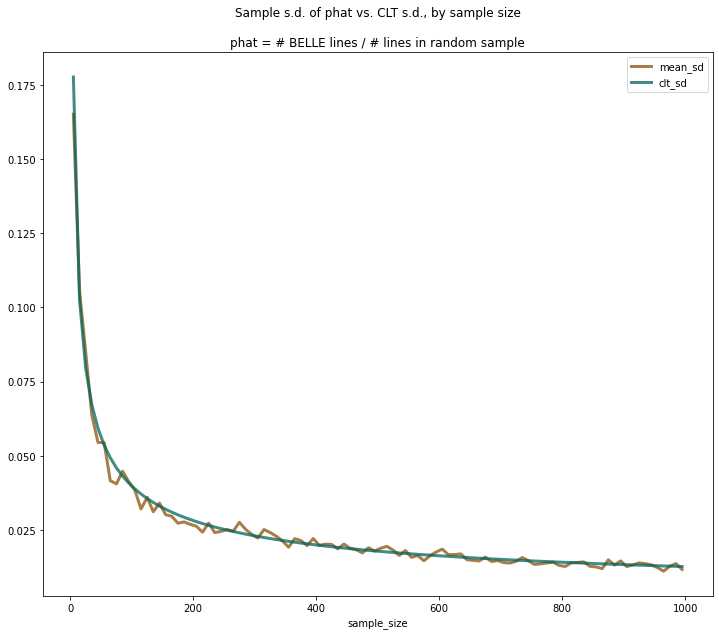

In [248]:
dmean.plot(kind = 'line', x = 'sample_size', y = ['mean_sd', 'clt_sd'],
           linewidth = 3, color = pal, alpha = .75,
           figsize = (12, 10), title = 'Sample s.d. of phat vs. CLT s.d., by sample size\n\nphat = # BELLE lines / # lines in random sample')
plt.savefig('images/beauty_sd.jpeg')

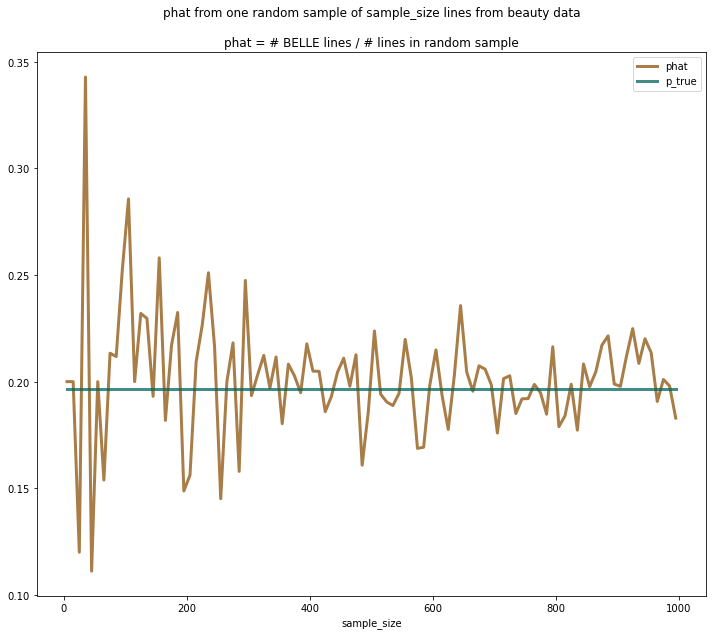

In [249]:
dmean.plot(kind = 'line', x = 'sample_size', y = ['phat', 'p_true'],
           linewidth = 3, color = pal, alpha = .75,
           figsize = (12, 10), title = 'phat from one random sample of sample_size lines from beauty data\n\nphat = # BELLE lines / # lines in random sample')
plt.savefig('images/beauty_mean.jpeg')

### paris stats


Paris Kea stats from the 2017-18 basketball season. Possibly not the whole season.

In [168]:
d = pd.read_csv('https://raw.githubusercontent.com/brendanrbrown/stor155_sp21/main/data/paris_stats.csv')

In [180]:
# training set
dtrain = d.loc[:25]
# test set
dtest = d.loc[26:]

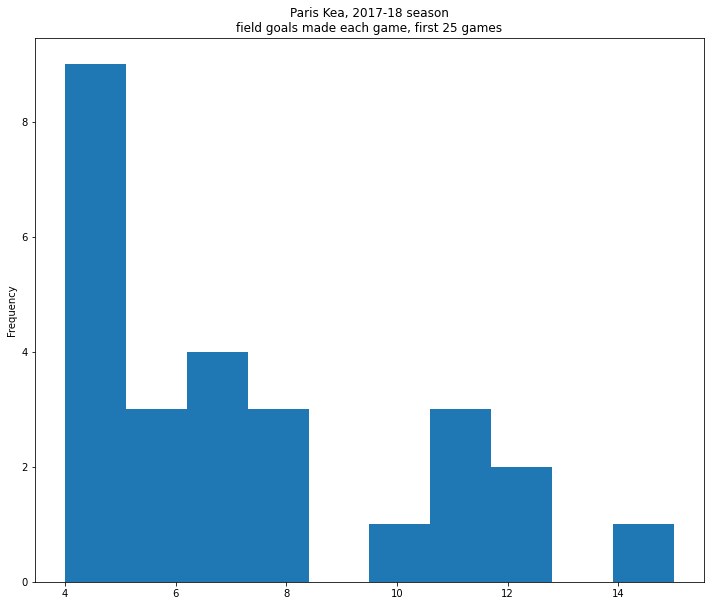

In [181]:
dtrain.field_goals_made.plot.hist(figsize = (12, 10), title = 'Paris Kea, 2017-18 season\nfield goals made each game, first 25 games')
plt.savefig('images/paris_train.jpeg')

In [182]:
# estimate p parameter of binomial
p = dtrain.field_goals_made.sum()/dtrain.fg_attempts.sum()
p

0.47880299251870323

In [186]:
dtest.assign(fg_made_pred = dtest.fg_attempts * p).loc[:, ['game', 'field_goals_made', 'fg_made_pred']]

,game,field_goals_made,fg_made_pred
26,louisville,5,5.745636
27,syracuse,5,7.182045
28,duke,3,5.266833
29,boston college,12,10.533666
30,nc state,9,11.012469


### clt stuff

In [187]:
def rvmeans(f_rv, *args, **kwargs):
    x = f_rv(*args, **kwargs)
    return x.mean()

def clt_examples(N, size):
    uscale = np.sqrt(12)
    uloc = 2 - np.sqrt(12)/2
       
    d = [[rvmeans(stats.binom.rvs, 4, .5, size = size),
        rvmeans(stats.uniform.rvs, loc = uloc, scale = uscale, size = size),
        rvmeans(stats.norm.rvs, 2, 1, size = size)] for i in range(N)]
    d = pd.DataFrame(d, columns = ['binom', 'uniform', 'normal'])
    
    return d

<AxesSubplot:title={'center':'Central limit theorem\nDensities of sample means from three distributions'}, ylabel='Density'>

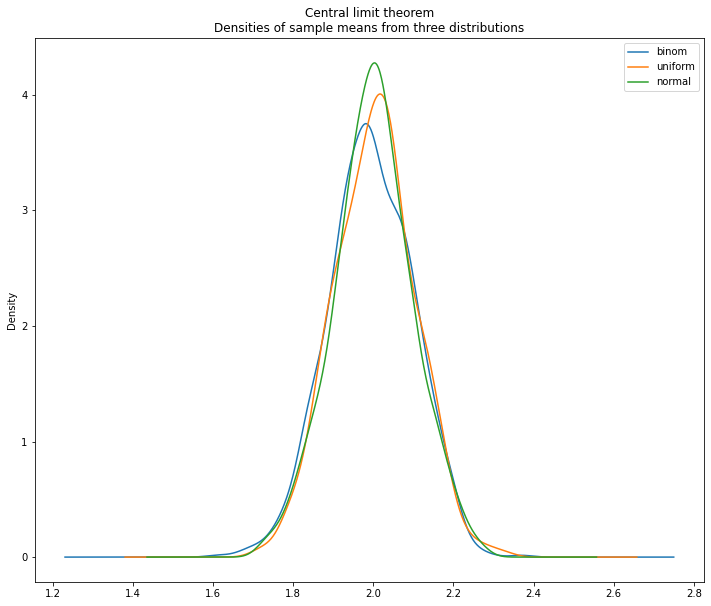

In [188]:
clt_examples(1000, 100).plot(kind = 'kde', figsize = (12, 10),
                           title = 'Central limit theorem\nDensities of sample means from three distributions')

<AxesSubplot:ylabel='Density'>

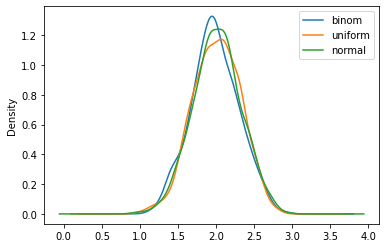

In [189]:
clt_examples(1000, 10).plot.kde()